## (Kaggle) House Prices: Advanced Regression Techniques

# 1. Introduction

House Price Prediction project was being launched two years ago, and it will be closed after two years from now. According to the current statistics, 4543 teams have been joining in this competition, counting up to 4730 competitors for now. As one of three competitions for starters, House Prices problem requires us to build a predictive model with advanced regression techniques to predict the sale price of a house in Ames, Iowa, based on many features of this house (location, size, condition, etc). 

In this problem, we are given a training set and a testing data set.  The training data set has 1460 rows and 81 columns, in which every row is a record of house sales. The testing data set has 1459 rows, where every row is a house with different features, and 80 columns with each row representing one single feature of a house. The main purpose of this project is to train a model based on analysis of training dataset, and apply this model to predict the sale price of houses in our testing dataset. 

In the real world, some companies have developed their own models to predict the house price, such as Zillow. In our common knowledge, some influential factors in deciding the house price are obvious, such as community, area of house, amenities, construction materials, etc, while some factors might hard to locate when people might even not realize their importance. This is the purpose of data analysis: to find all correlation, association, or interactions between factors, and factors to sale price, which is hiding in the numbers. Based on findings we gathered, a proper model would be produced as a result.

This problem is of great importance in the real world as we discussed in last paragraph. Despite the reduced data records, this competition, however, is still a complicated case. Although its complexity, this problem can be breaking into several small pieces: exploring the data, cleaning data, selecting features, selecting models. For each of these puzzles, we need to use data analysis skills and programming skills to solve this problem step by step. 


# 2 Research and methodology used in similiar problems

## 2.1 Business and industry

There are different approaches to predict the price of houses in real estate industry and academic world. Since the academic approaches are more focused on statistic models and methods, real world industries tend to take in more factors, such as time series, policies, economic factors, etc. In the following part, we would like to briefly introduce some approached in industries and academics. In real estate industry, as we know, house price prediction is usually completed by property agencies. Followings are some traditional ways property agencies use in China to evaluate the house price:

(1)	The cost-product algorithm, which counting the cost of acquiring land or cost of land development achieved, removing the value of abnormal factors, and taking in certain amount of capital interest and reasonable investment profits after accumulating the normal costs, then deriving an estimate value of land use rights as a result. This method is often used for the evaluation of land acquired through normal procedures.

(2)	Replacement cost method is also a common method in real world. First, it measures the cost of reconstructing a house under an existing market standard for an existing house. It then takes into account the interest on the funds and takes a certain amount of development (or construction profit) to deriving a fully replacement cost price. Then according to the actual situation and legal norms to determine the new rate of housing, At the end, it will multiple the fully replacement price and the new rate of housing to obtain the value of the house.

(3)	In the market, picking up real estate cases, which have already been traded or evaluated, with the same use and other similar conditions according to conditions of the real estate to be assessed. Then quantifying the indexes of each factor, through the accurate index comparison and adjustment, to find out the value of houses. This method is popular because of its practical significance and accuracy. It is usually used when the market is mature, transactions are transparent, and comparison cases are easy to find. 


## 2.2 Academics

In academic world, there are various ways to predict the house price from different academic fields. For computing and statistic, as well as in machine learning fields, the feature selection and model selection are of great importance since features are closely related to accuracy of models and better models usually performs better when make predictions. 

Linear Regression
As the simplest regression model, linear regression uses a linear combination of independent variables to estimate a continuous dependent variable (C. M. Bishop, 2006). As Alex Seutin and Ian Jones did in their work, they put selected features which can represent the linear relationship best, then used vanilla linear regression predictor to take in raw data. They found the linear regression had potential to perform well given well-chosen features (Alex Seutin, Ian Jones, 2016). Furthermore, they tried random forest model from scikitlearn. They use package of sklearn.ensemble.RandomForestRegressor, which produce the best output achieved by a single algorithm(Alex Seutin, Ian Jones, 2016). 

XGBoost
Another commonly used model in analyzing the house price is the XGBoost model, which is an implementation of gradient boosted decision tree designed for speed and performance (Jason Brownlee, 2016).  It is the abbreviation for extreme gradient boosting, referring to the engineering goal to push the limit of computations resources for boosted tree algorithms (Jason Brownlee, 2016).  This model is focused on execution speed and model performance since it would make the best use of available resources to train the model and it would handle missing data value automatically. This model is becoming popular through these years and we can identify this model in many Kaggle winner's algorithms. 

Ridge regression and Lasso
Other models, such as ridge regression and lasso method, are also frequently be used to do a multivariate analysis. Ridge regression is a regularized and is also an extension for linear regression model. It will eliminate the irrelevant features' influence on train models, which is useful when people try to optimize their models. Lasso is also an extension for linear regression but the difference is that the regulation term is in absolute value (Ofir Chakon, 2017) and it improve the ridge regression by setting coefficient to zero when they are not relevant. 

# 3. Descriptive Analytics

In [6]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.special import boxcox1p

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

## 3.1 Basic Statistics

In [7]:
path = 'https://raw.githubusercontent.com/cooldoggo/kaggle1/master'
df_train = pd.read_csv(path + '/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

***The train set contains 1460 rows: each of these represents one house sold.***

In [8]:
df_test = pd.read_csv(path + '/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

***The test set contains 1459 rows.***

***The train set contains 81 columns. The first 80 of these also appear in the test set: these will be the features on which we will base our predictions. The final column, SalePrice, is our target variable.***

In [9]:
#Save the test data set 'Id' column for final submission
test_ID = df_test['Id']

df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 3.2 Variables' Distributions

In order to get deeper understanding of our data, we use three types of graphs to show the distribution of all variables in this dataset: kde graph, bar graph, and box graph. In this step, we write a function to describe data, if the data type is object and the value count is lower than 20,  we use bar graph, if not, we used box and kde graph to show the value distribution. 

### 3.2.1 Attributes variables

In [10]:
def describeData(DataFrame):
    feature_name=list(DataFrame.keys())
    data_type=[]
    for i in DataFrame.dtypes:
        data_type.append(str(i))
    for i in range(len(feature_name)):
        if data_type[i]=='object' or len(DataFrame.iloc[:,i].value_counts()) < 20:
            print(DataFrame.iloc[:,i].describe())
            print(DataFrame.iloc[:,i].value_counts())
            DataFrame.iloc[:,i].value_counts().plot(kind='bar',figsize=(5,5),title=feature_name[i])
            plt.show()
        else:
            print(DataFrame.iloc[:,i].describe())
            DataFrame.iloc[:,i].plot(kind='box',figsize=(5,5),title=feature_name[i])
            plt.show()
            DataFrame.iloc[:,i].plot(kind='kde',figsize=(5,5),title=feature_name[i])
            plt.show()
        print('\n')

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


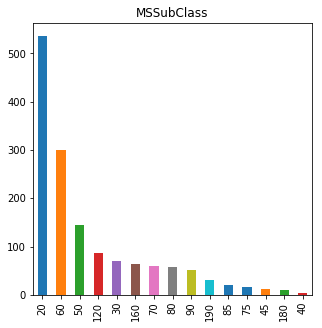



count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


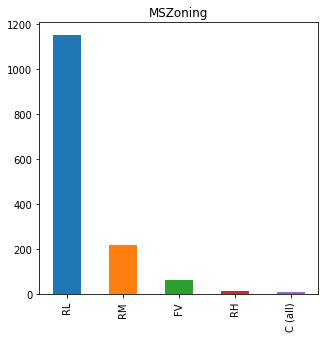



count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


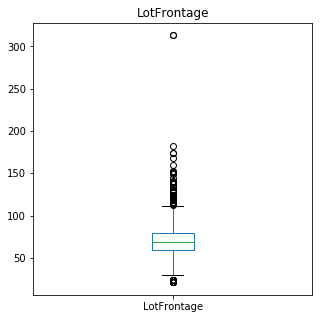

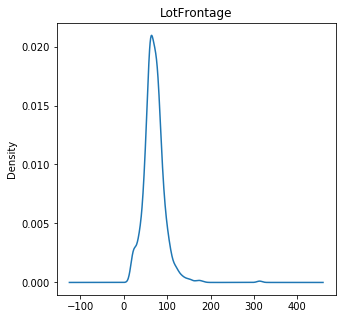



count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


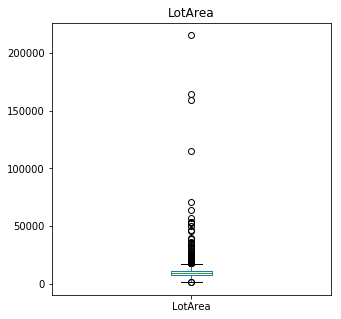

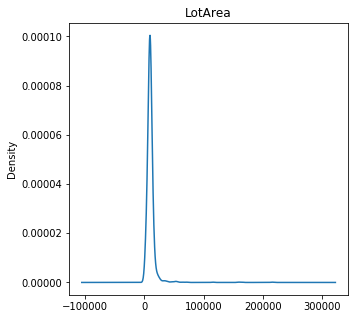



count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
Pave    1454
Grvl       6
Name: Street, dtype: int64


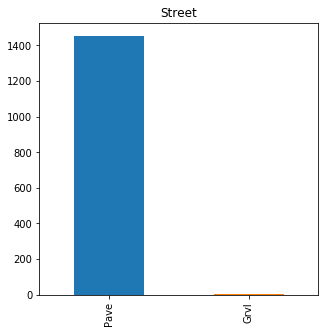



count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
Grvl    50
Pave    41
Name: Alley, dtype: int64


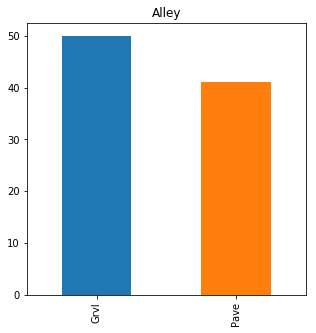



count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


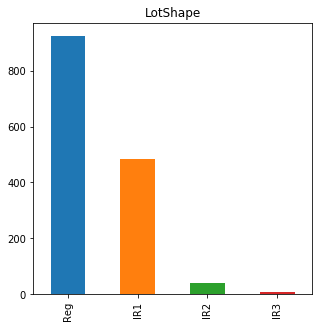



count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


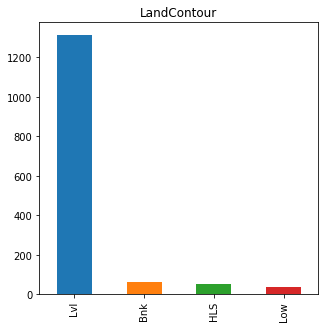



count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


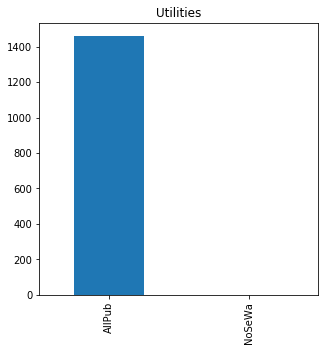



count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


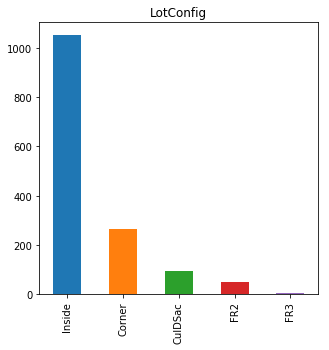



count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


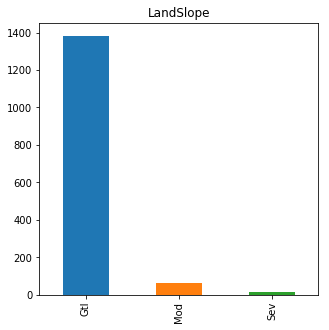



count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


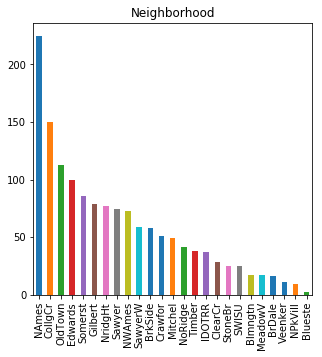



count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


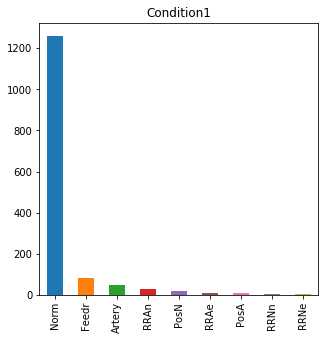



count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


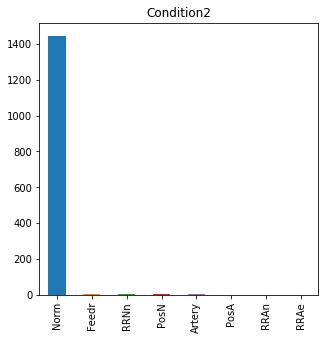



count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


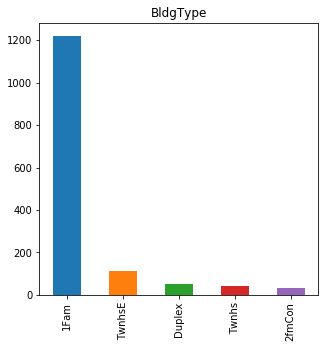



count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


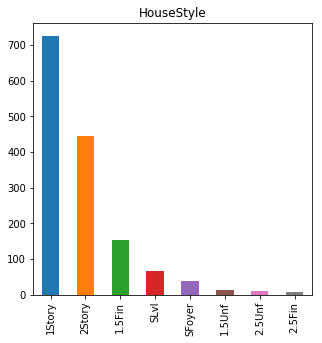



count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


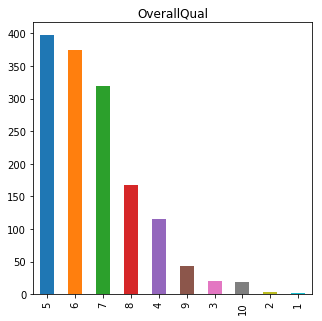



count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


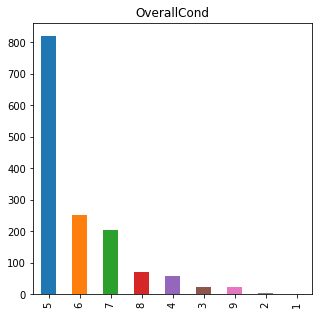



count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


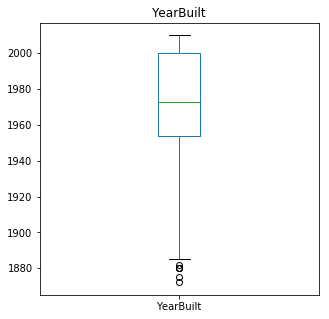

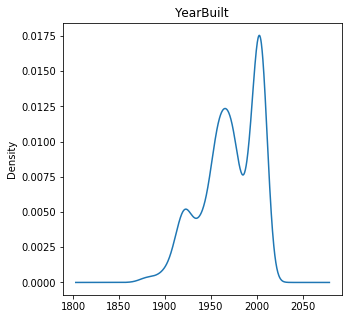



count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


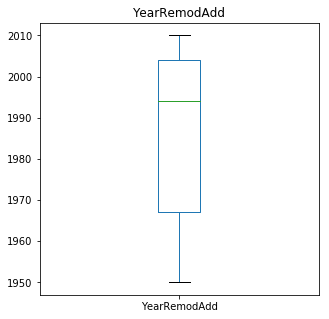

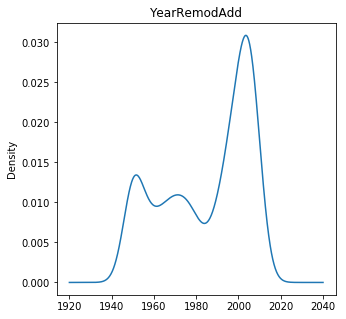



count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


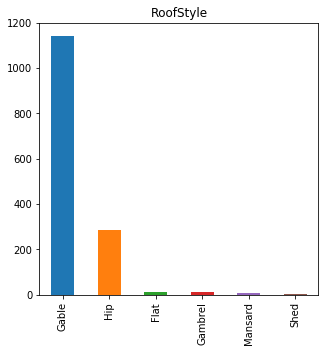



count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64


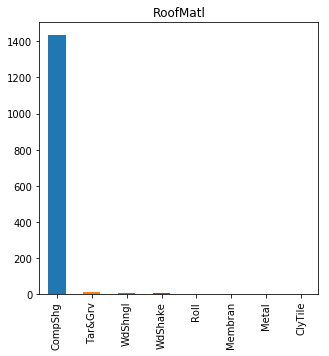



count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


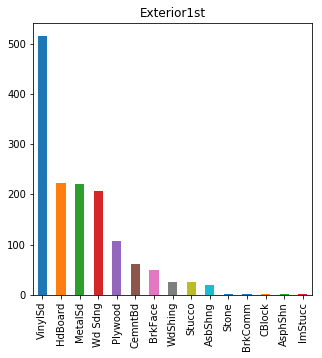



count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


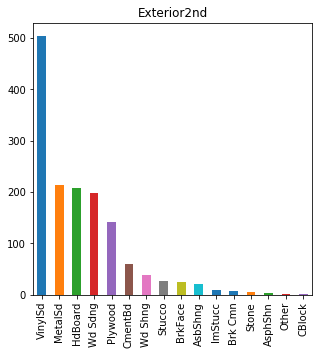



count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


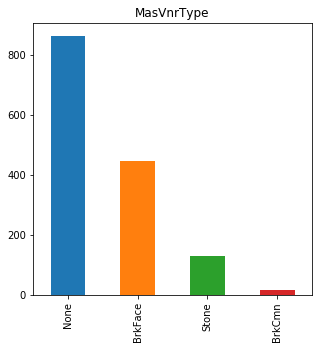



count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


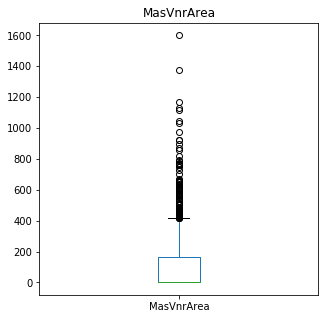

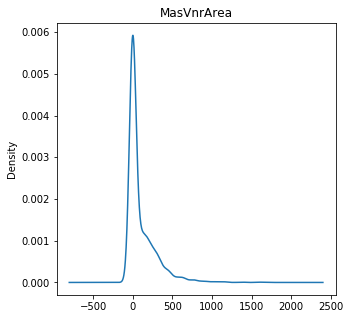



count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


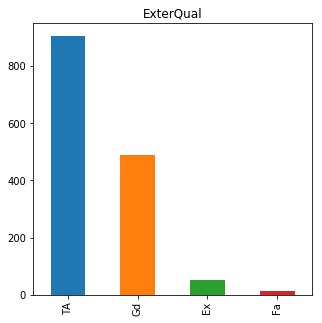



count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


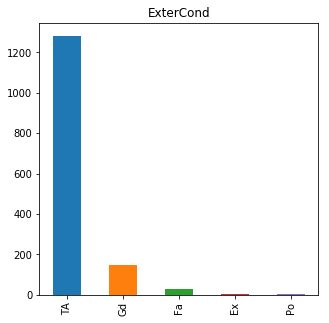



count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


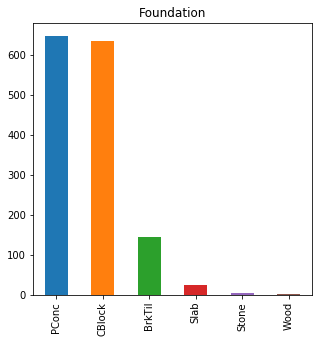



count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


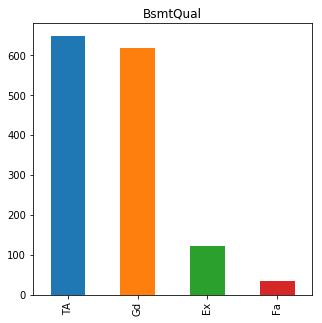



count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


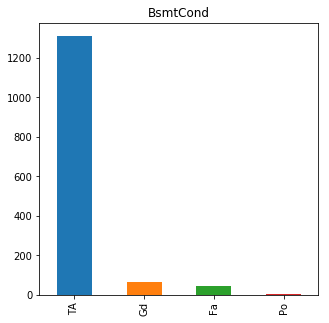



count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


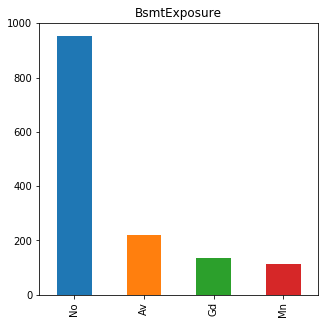



count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


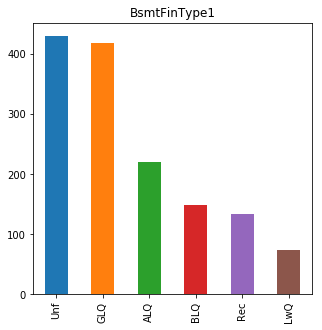



count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


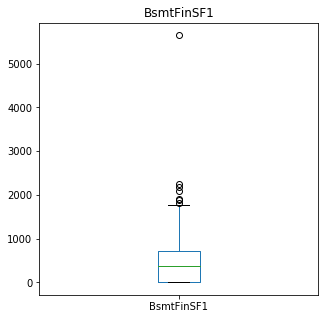

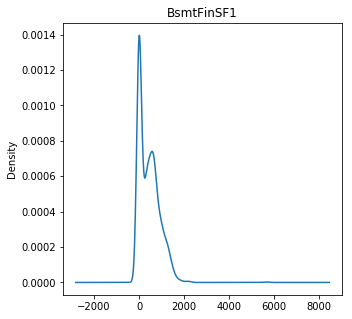



count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


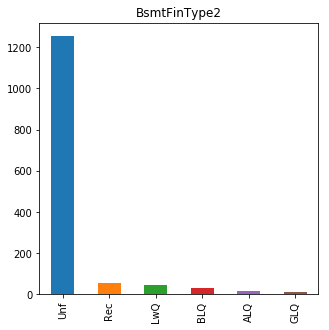



count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


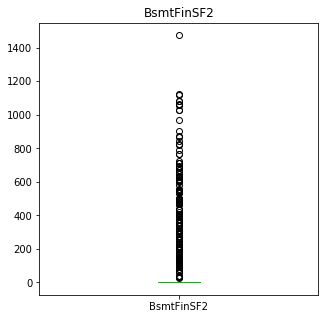

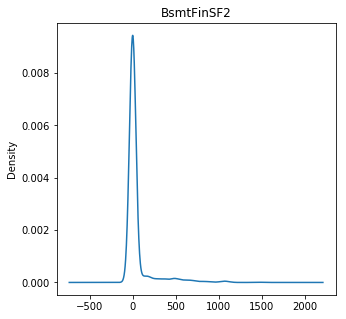



count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


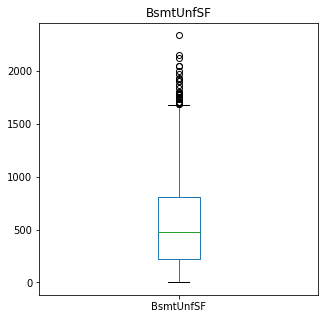

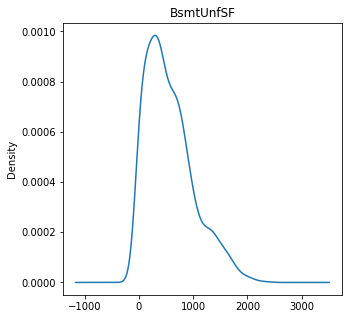



count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


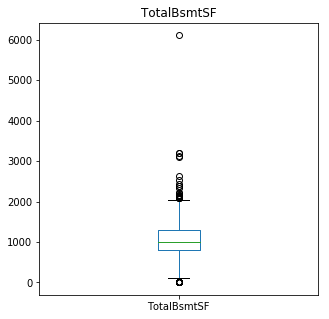

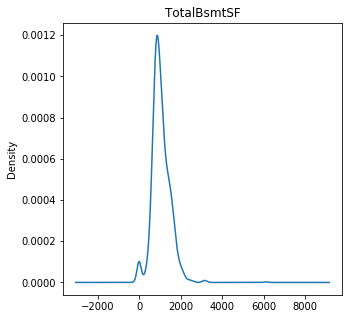



count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


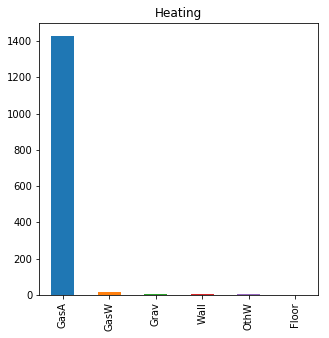



count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


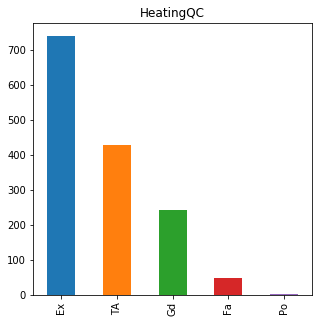



count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
Y    1365
N      95
Name: CentralAir, dtype: int64


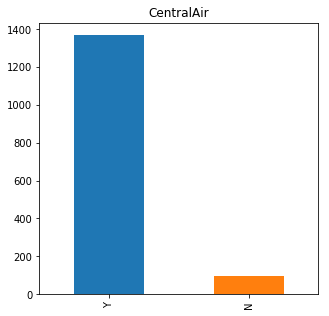



count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


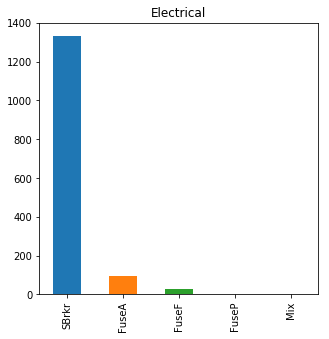



count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


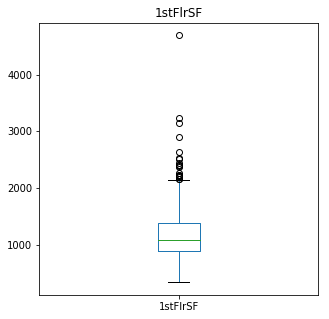

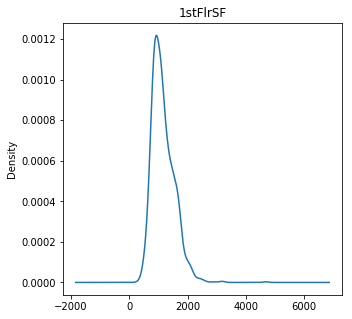



count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


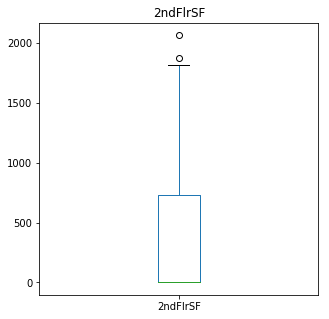

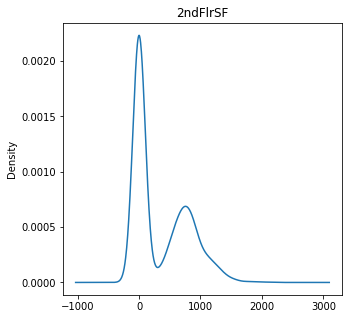



count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


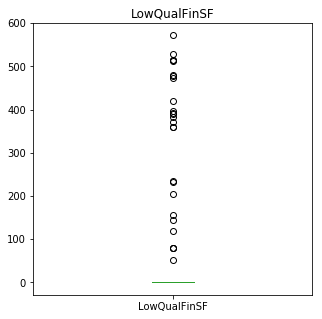

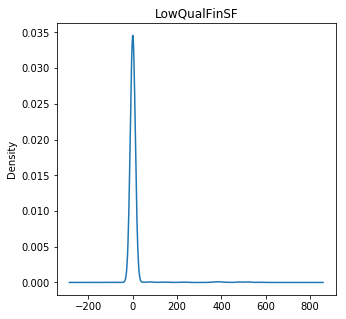



count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


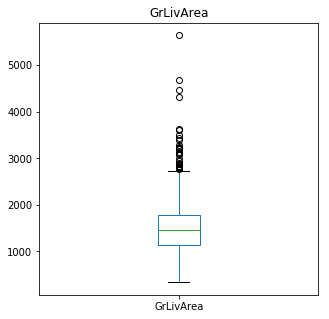

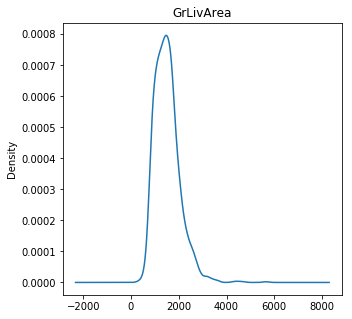



count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


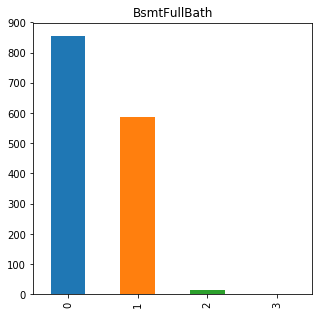



count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


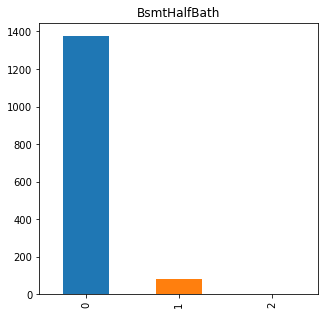



count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


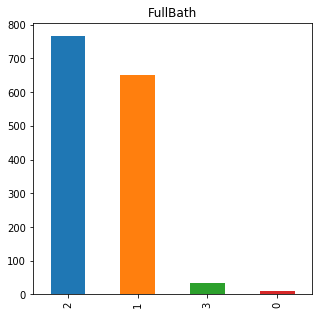



count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
0    913
1    535
2     12
Name: HalfBath, dtype: int64


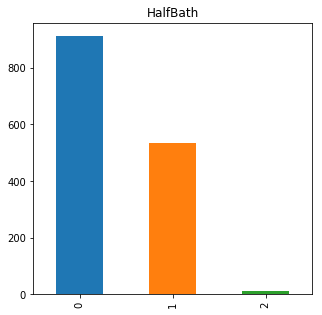



count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


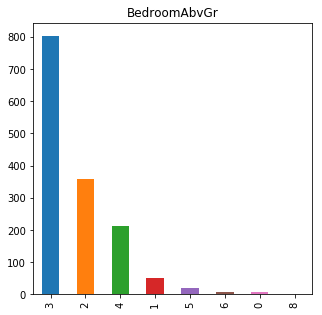



count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


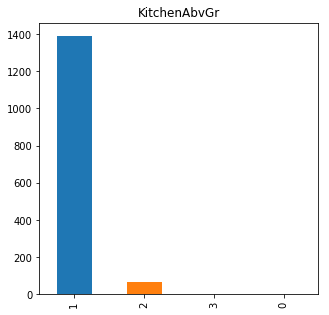



count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


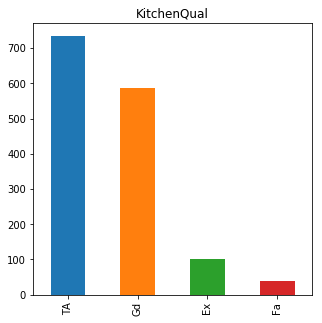



count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


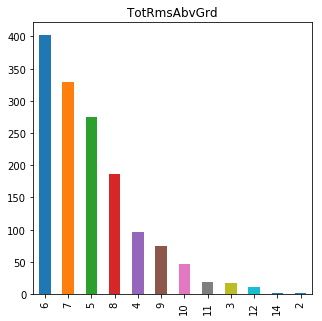



count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


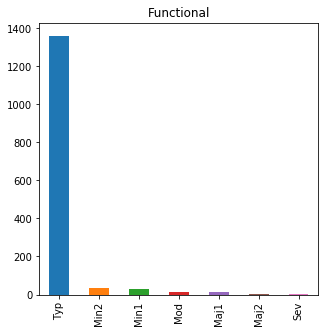



count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


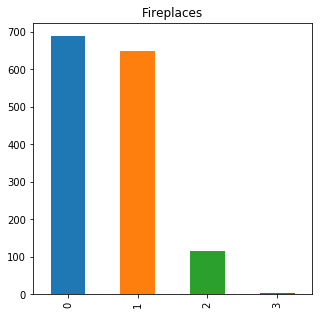



count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


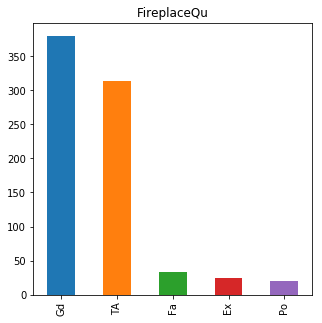



count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


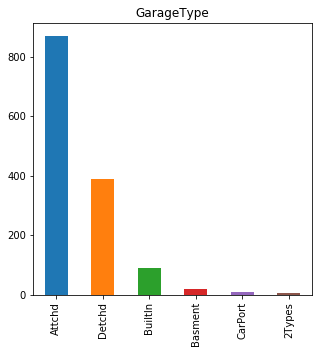



count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


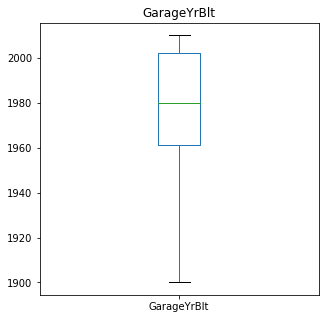

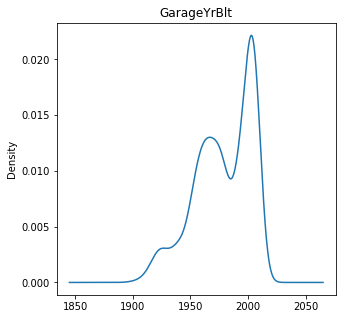



count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


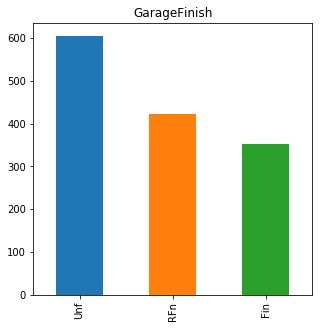



count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


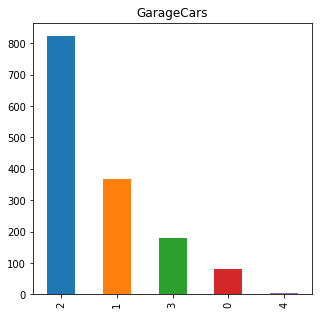



count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


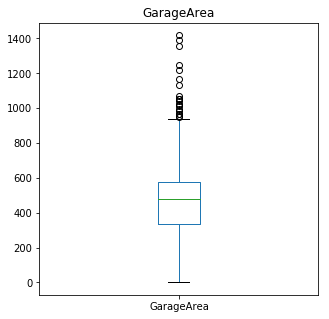

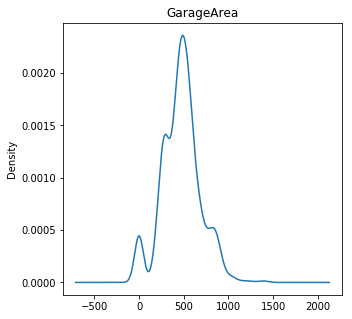



count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


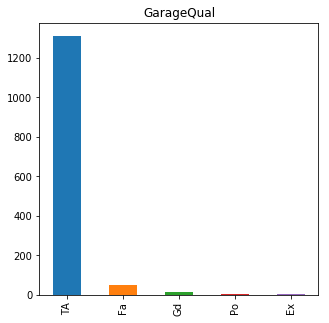



count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


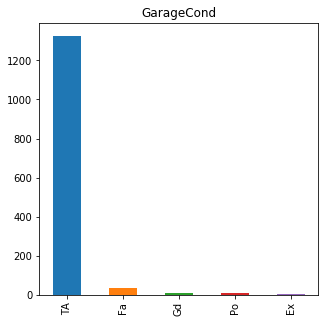



count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


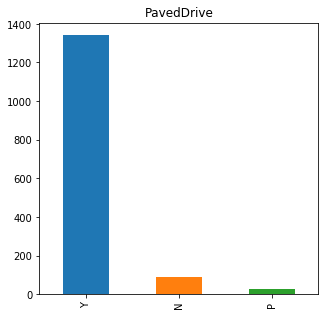



count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


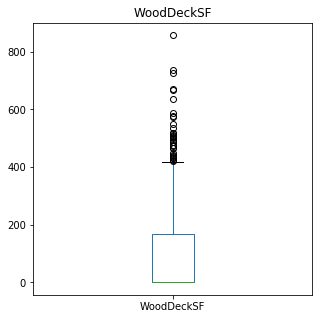

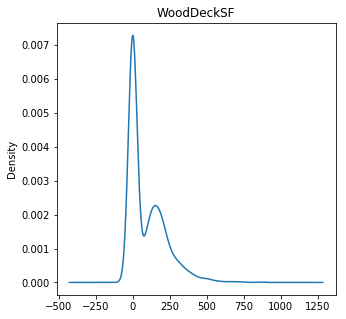



count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


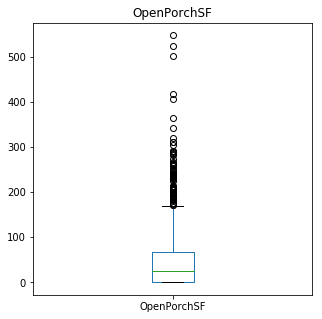

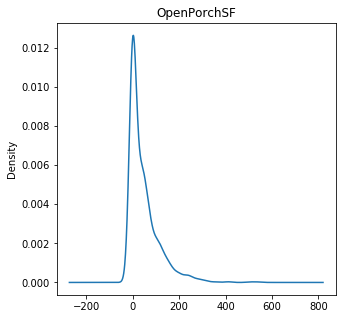



count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


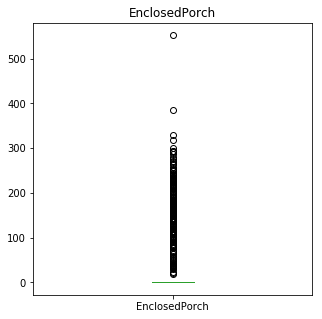

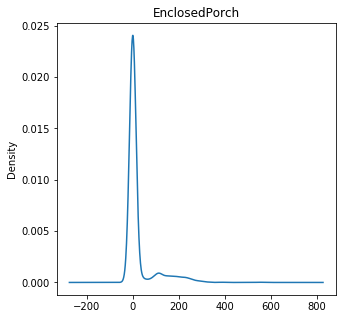



count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


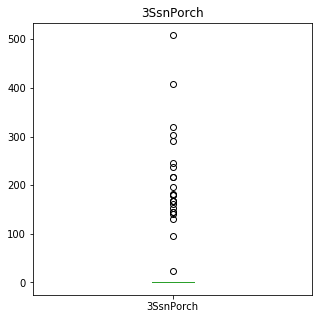

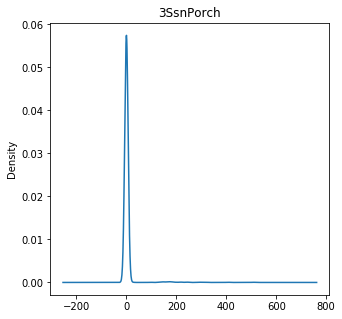



count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


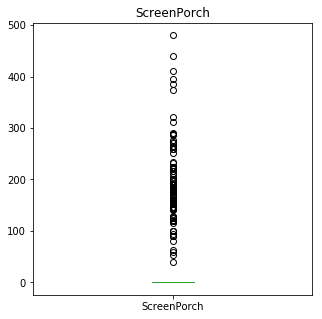

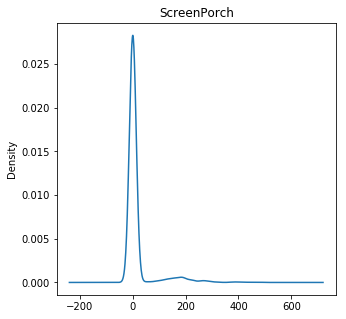



count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


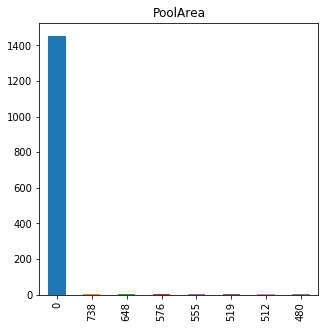



count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object
Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


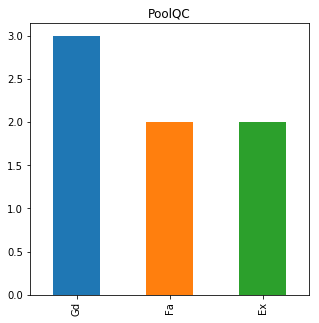



count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


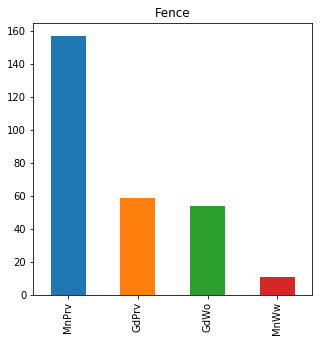



count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


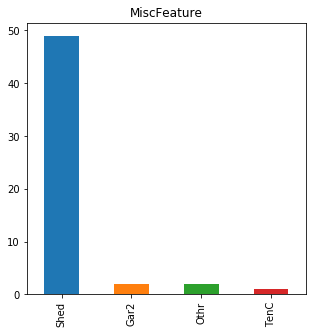



count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


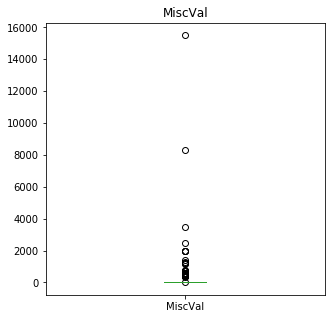

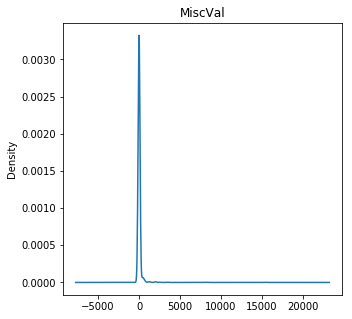



count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


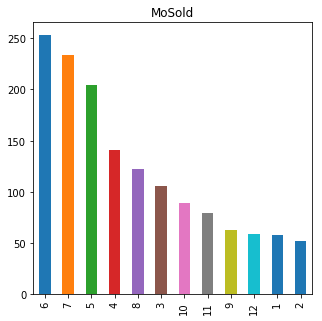



count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


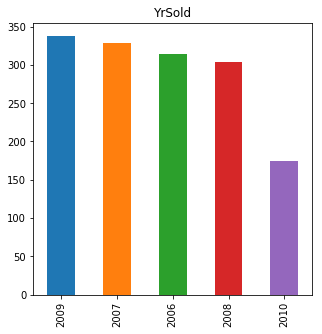



count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


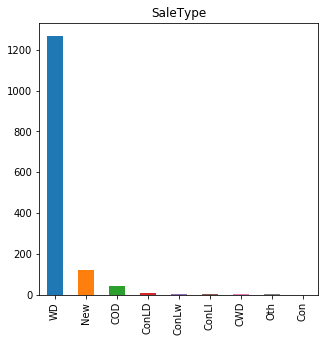



count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


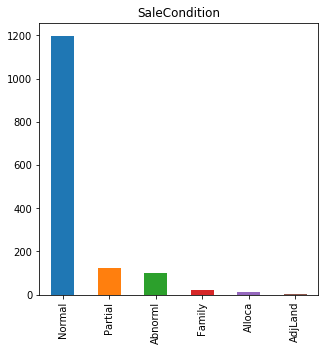



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


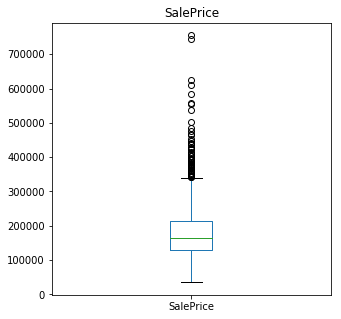

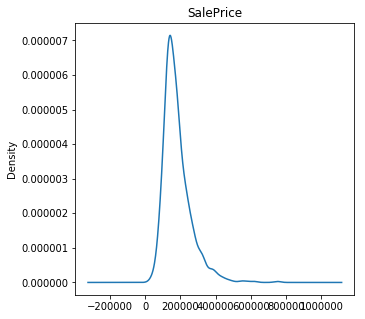

In [11]:
describeData(df_train)

count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64


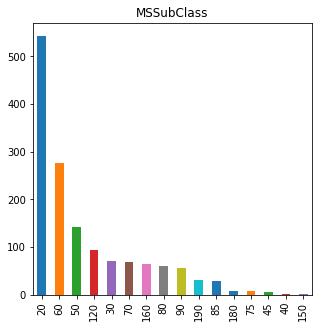



count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


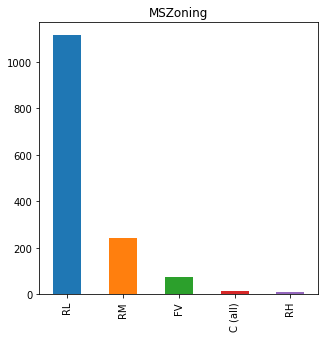



count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64


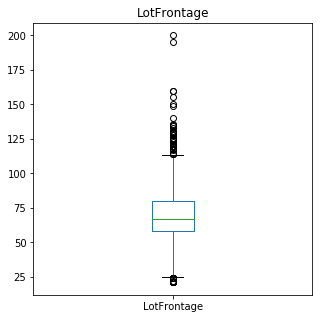

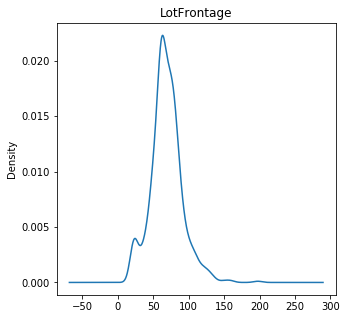



count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64


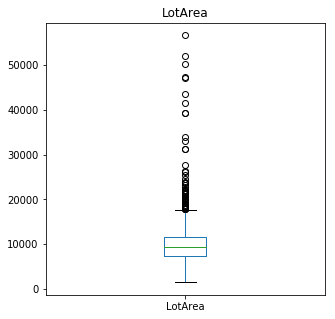

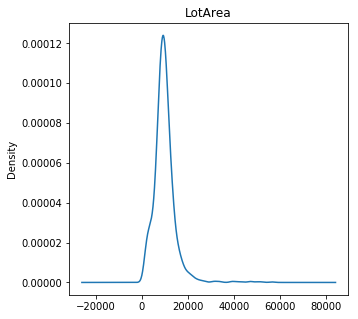



count     1459
unique       2
top       Pave
freq      1453
Name: Street, dtype: object
Pave    1453
Grvl       6
Name: Street, dtype: int64


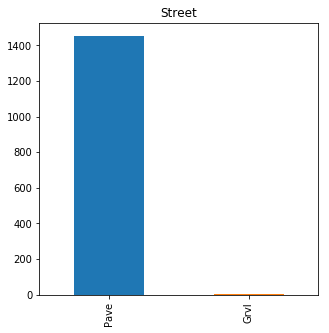



count      107
unique       2
top       Grvl
freq        70
Name: Alley, dtype: object
Grvl    70
Pave    37
Name: Alley, dtype: int64


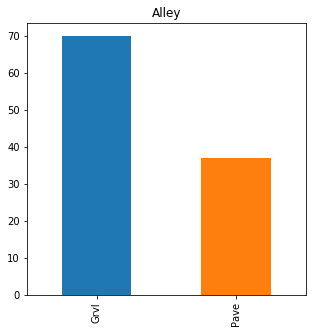



count     1459
unique       4
top        Reg
freq       934
Name: LotShape, dtype: object
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64


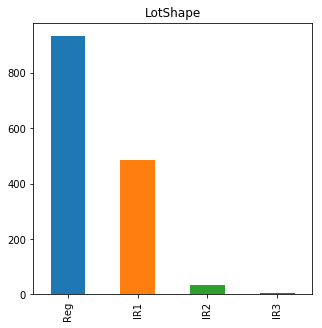



count     1459
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64


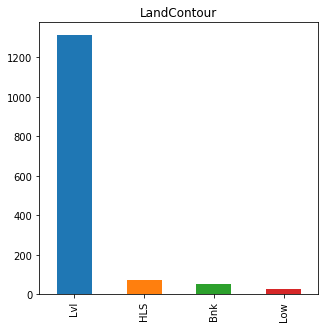



count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object
AllPub    1457
Name: Utilities, dtype: int64


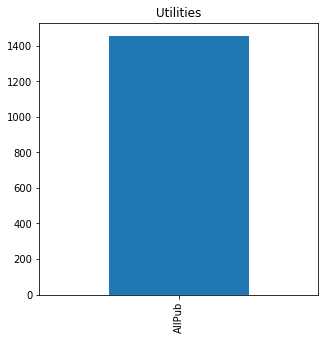



count       1459
unique         5
top       Inside
freq        1081
Name: LotConfig, dtype: object
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


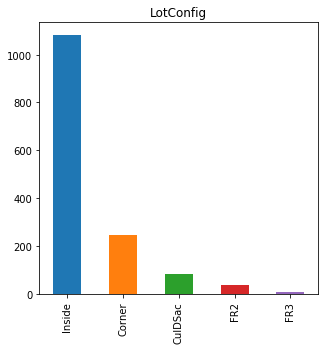



count     1459
unique       3
top        Gtl
freq      1396
Name: LandSlope, dtype: object
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64


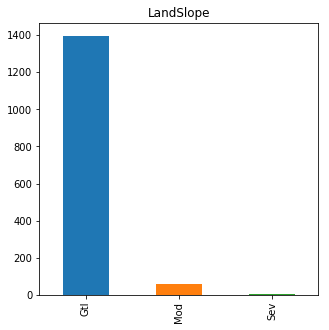



count      1459
unique       25
top       NAmes
freq        218
Name: Neighborhood, dtype: object
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64


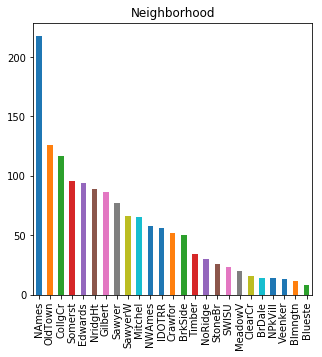



count     1459
unique       9
top       Norm
freq      1251
Name: Condition1, dtype: object
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64


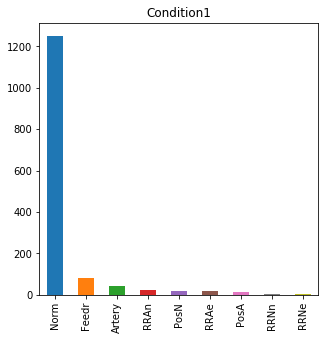



count     1459
unique       5
top       Norm
freq      1444
Name: Condition2, dtype: object
Norm      1444
Feedr        7
PosA         3
Artery       3
PosN         2
Name: Condition2, dtype: int64


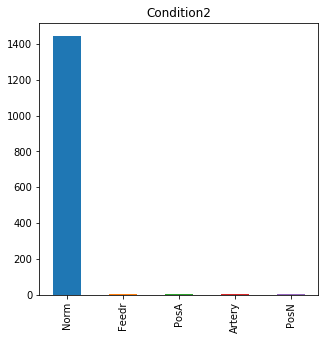



count     1459
unique       5
top       1Fam
freq      1205
Name: BldgType, dtype: object
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64


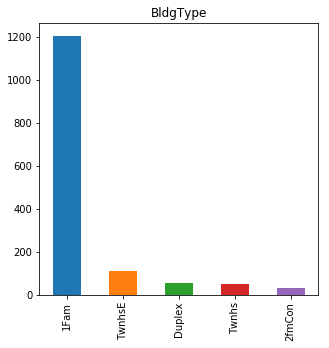



count       1459
unique         7
top       1Story
freq         745
Name: HouseStyle, dtype: object
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64


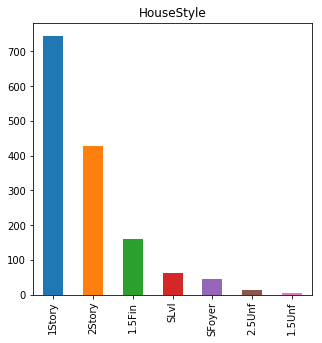



count    1459.000000
mean        6.078821
std         1.436812
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64


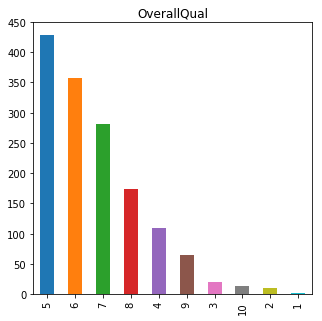



count    1459.000000
mean        5.553804
std         1.113740
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64


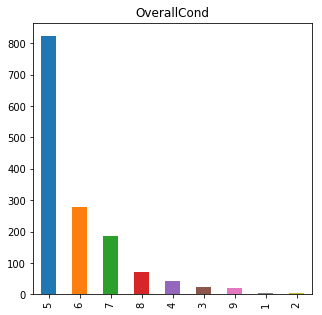



count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64


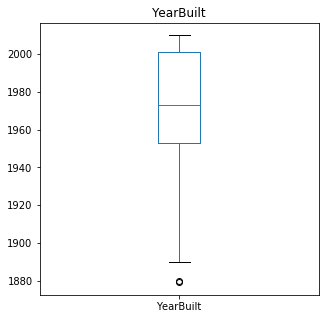

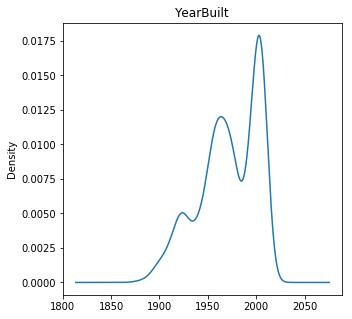



count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


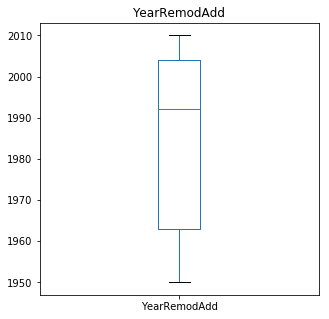

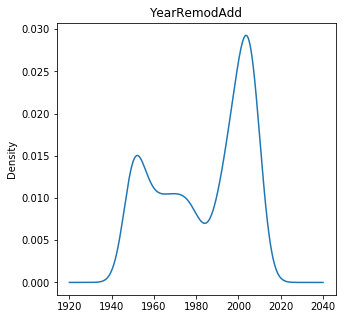



count      1459
unique        6
top       Gable
freq       1169
Name: RoofStyle, dtype: object
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64


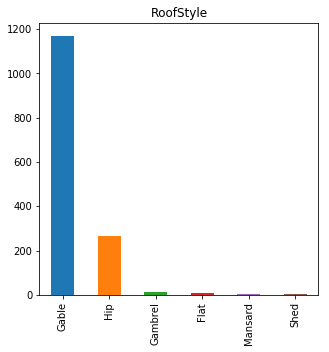



count        1459
unique          4
top       CompShg
freq         1442
Name: RoofMatl, dtype: object
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64


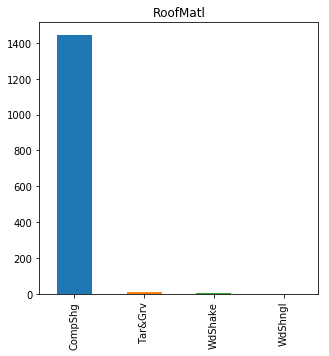



count        1458
unique         13
top       VinylSd
freq          510
Name: Exterior1st, dtype: object
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64


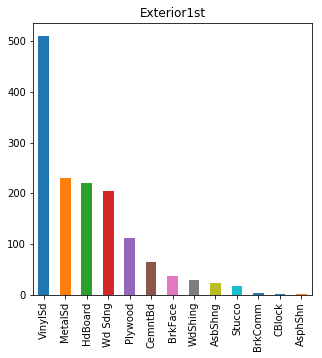



count        1458
unique         15
top       VinylSd
freq          510
Name: Exterior2nd, dtype: object
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64


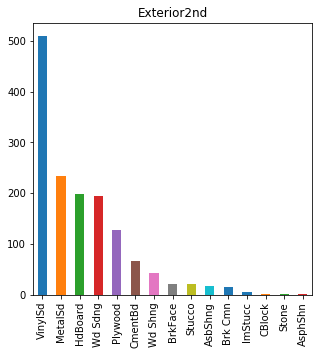



count     1443
unique       4
top       None
freq       878
Name: MasVnrType, dtype: object
None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64


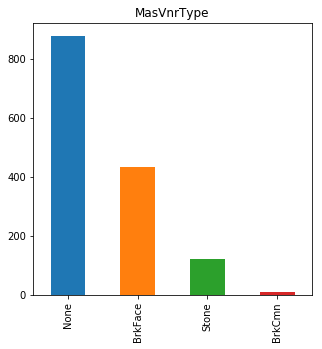



count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64


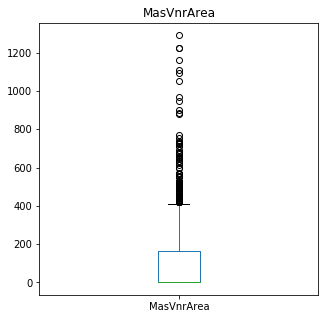

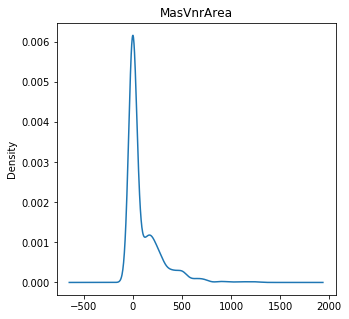



count     1459
unique       4
top         TA
freq       892
Name: ExterQual, dtype: object
TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64


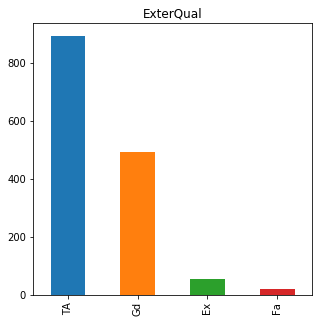



count     1459
unique       5
top         TA
freq      1256
Name: ExterCond, dtype: object
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64


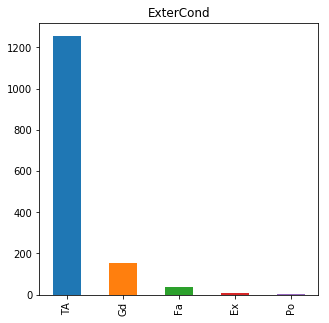



count      1459
unique        6
top       PConc
freq        661
Name: Foundation, dtype: object
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64


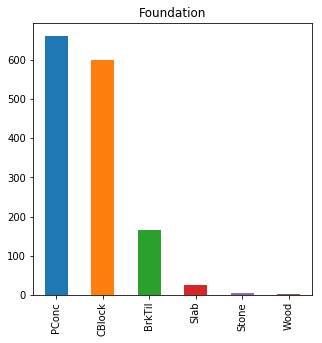



count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object
TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64


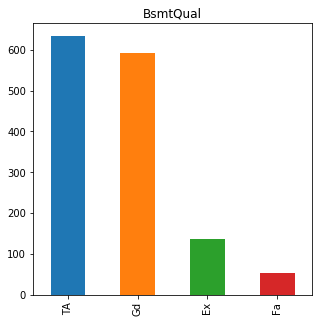



count     1414
unique       4
top         TA
freq      1295
Name: BsmtCond, dtype: object
TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64


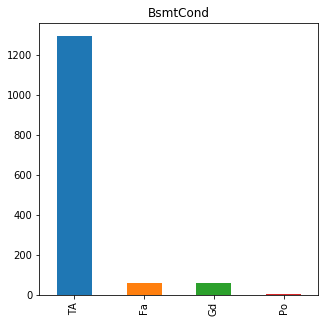



count     1415
unique       4
top         No
freq       951
Name: BsmtExposure, dtype: object
No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64


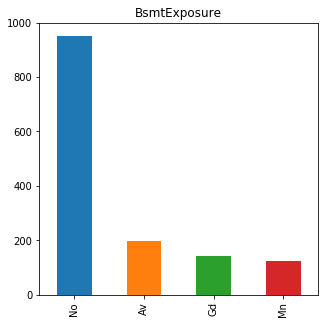



count     1417
unique       6
top        GLQ
freq       431
Name: BsmtFinType1, dtype: object
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64


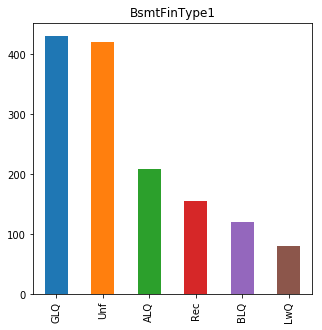



count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64


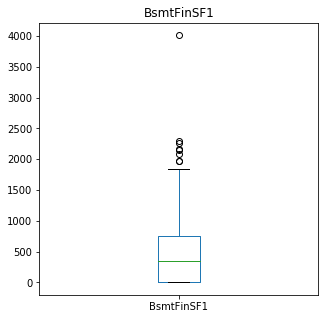

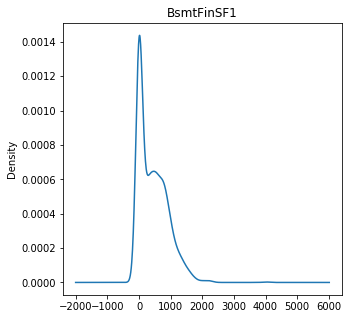



count     1417
unique       6
top        Unf
freq      1237
Name: BsmtFinType2, dtype: object
Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


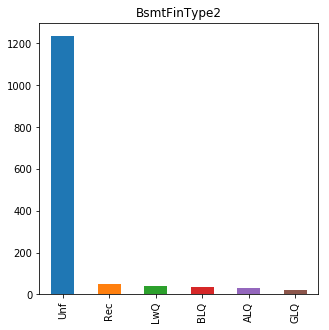



count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64


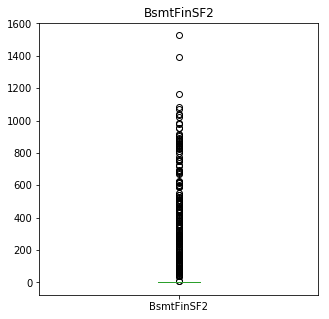

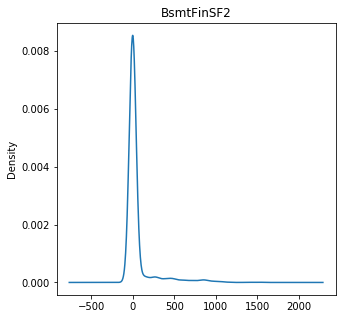



count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64


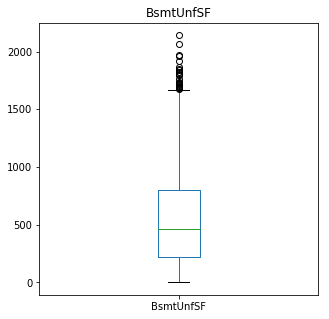

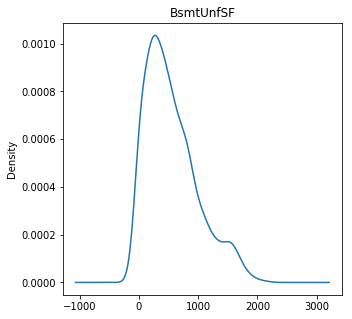



count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64


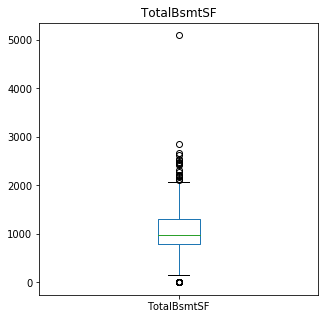

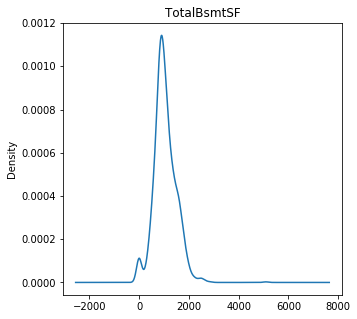



count     1459
unique       4
top       GasA
freq      1446
Name: Heating, dtype: object
GasA    1446
GasW       9
Grav       2
Wall       2
Name: Heating, dtype: int64


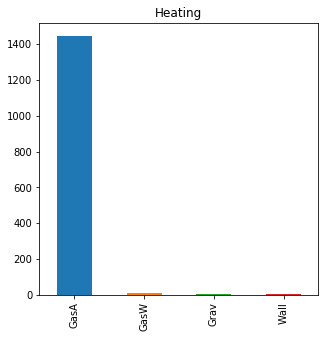



count     1459
unique       5
top         Ex
freq       752
Name: HeatingQC, dtype: object
Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64


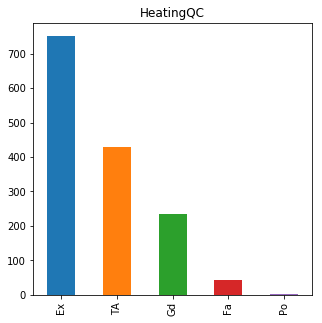



count     1459
unique       2
top          Y
freq      1358
Name: CentralAir, dtype: object
Y    1358
N     101
Name: CentralAir, dtype: int64


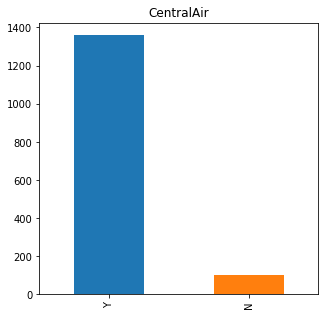



count      1459
unique        4
top       SBrkr
freq       1337
Name: Electrical, dtype: object
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64


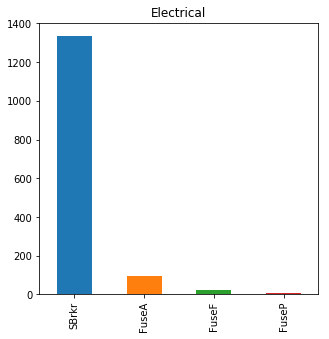



count    1459.000000
mean     1156.534613
std       398.165820
min       407.000000
25%       873.500000
50%      1079.000000
75%      1382.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64


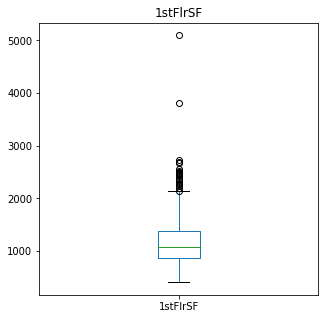

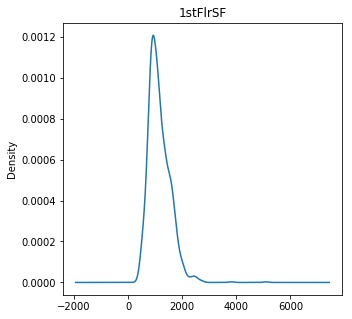



count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64


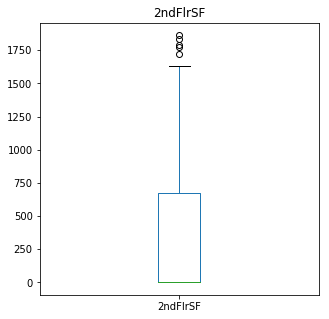

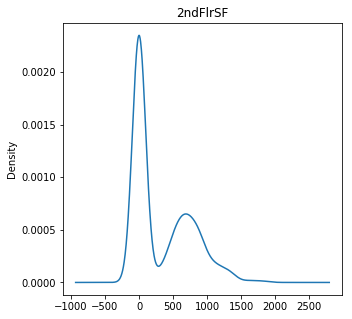



count    1459.000000
mean        3.543523
std        44.043251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
0       1445
1064       1
697        1
512        1
450        1
436        1
431        1
362        1
312        1
259        1
205        1
140        1
114        1
108        1
80         1
Name: LowQualFinSF, dtype: int64


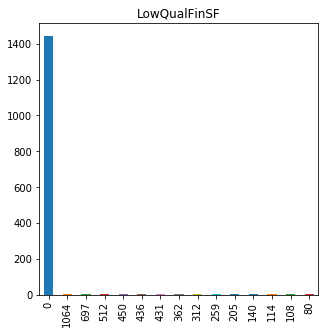



count    1459.000000
mean     1486.045922
std       485.566099
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1721.000000
max      5095.000000
Name: GrLivArea, dtype: float64


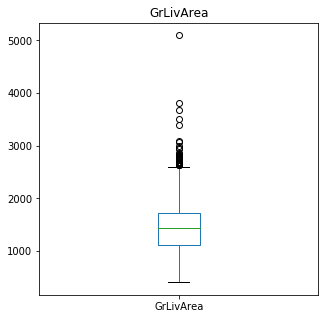

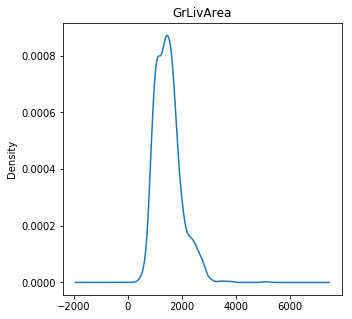



count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64


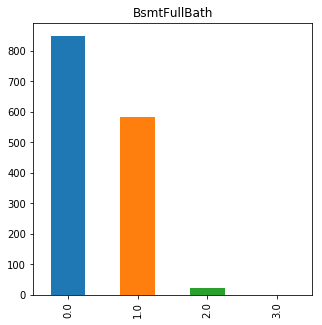



count    1457.000000
mean        0.065202
std         0.252468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64


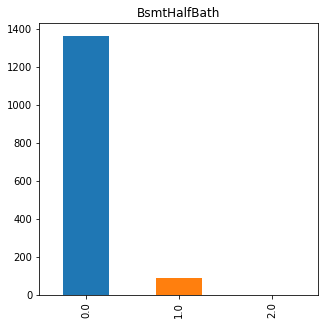



count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
2    762
1    659
3     31
4      4
0      3
Name: FullBath, dtype: int64


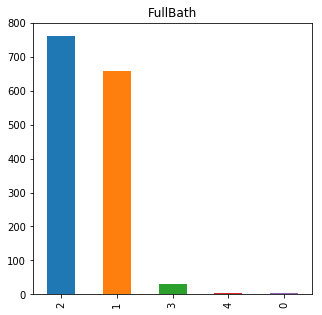



count    1459.000000
mean        0.377656
std         0.503017
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
0    921
1    525
2     13
Name: HalfBath, dtype: int64


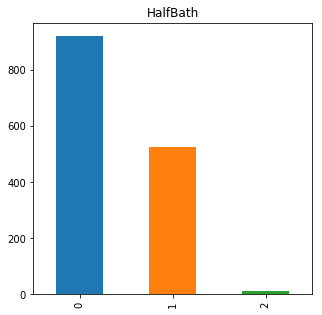



count    1459.000000
mean        2.854010
std         0.829788
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64
3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64


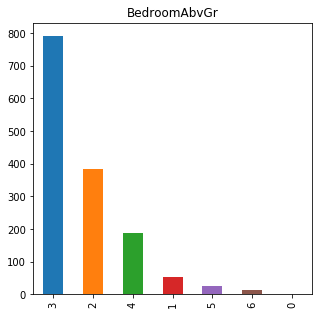



count    1459.000000
mean        1.042495
std         0.208472
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64


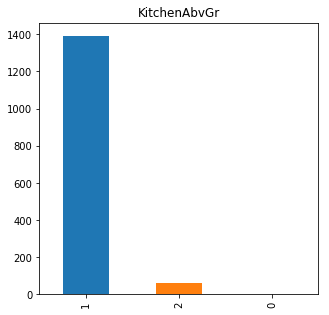



count     1458
unique       4
top         TA
freq       757
Name: KitchenQual, dtype: object
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


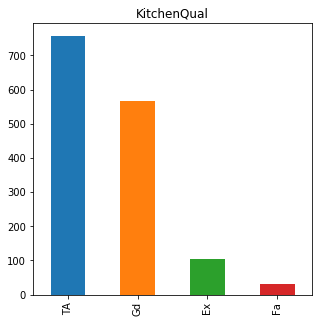



count    1459.000000
mean        6.385195
std         1.508895
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64


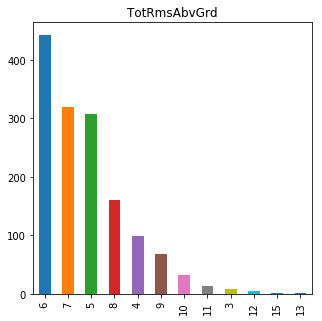



count     1457
unique       7
top        Typ
freq      1357
Name: Functional, dtype: object
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


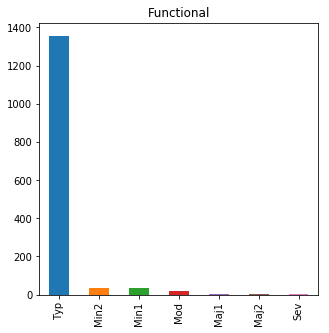



count    1459.00000
mean        0.58122
std         0.64742
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         4.00000
Name: Fireplaces, dtype: float64
0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64


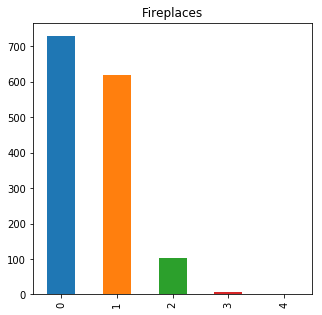



count     729
unique      5
top        Gd
freq      364
Name: FireplaceQu, dtype: object
Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64


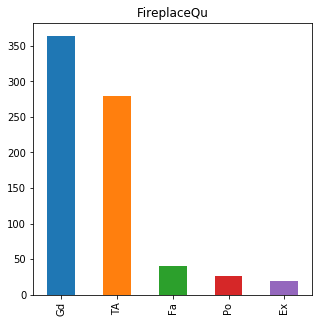



count       1383
unique         6
top       Attchd
freq         853
Name: GarageType, dtype: object
Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64


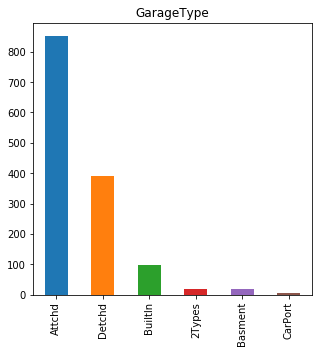



count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


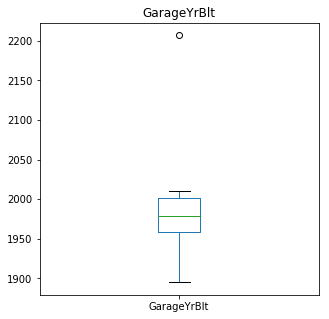

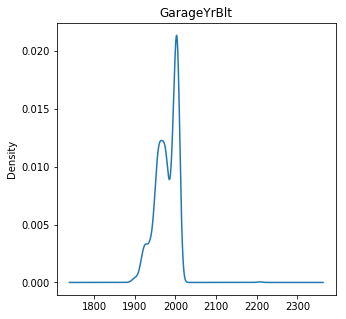



count     1381
unique       3
top        Unf
freq       625
Name: GarageFinish, dtype: object
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


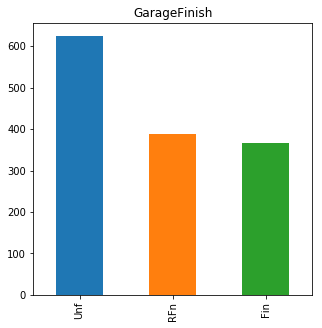



count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64


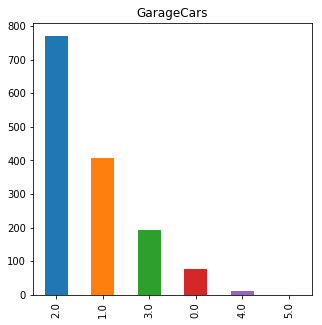



count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64


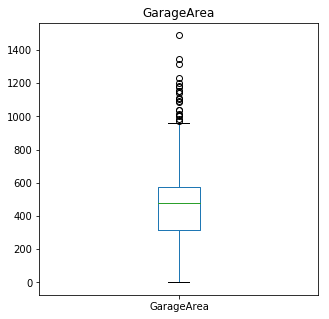

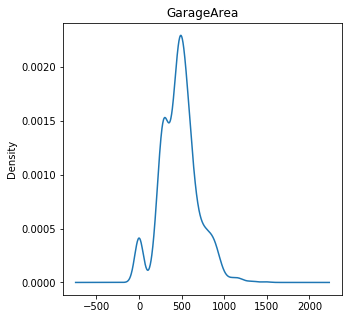



count     1381
unique       4
top         TA
freq      1293
Name: GarageQual, dtype: object
TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64


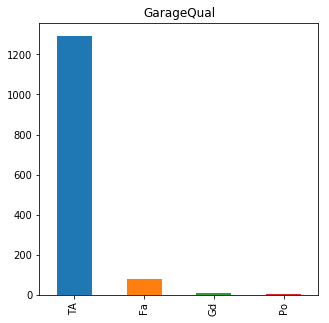



count     1381
unique       5
top         TA
freq      1328
Name: GarageCond, dtype: object
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64


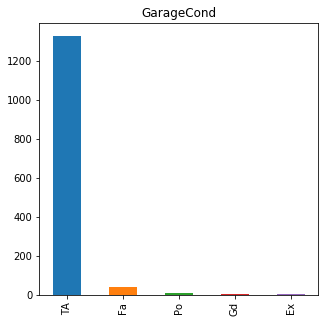



count     1459
unique       3
top          Y
freq      1301
Name: PavedDrive, dtype: object
Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64


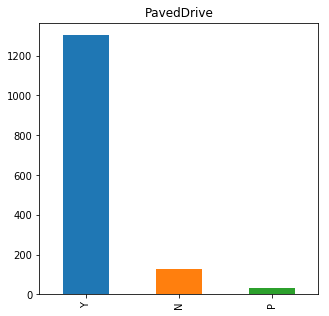



count    1459.000000
mean       93.174777
std       127.744882
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64


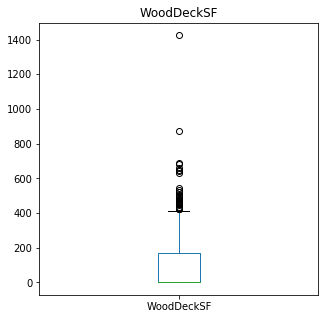

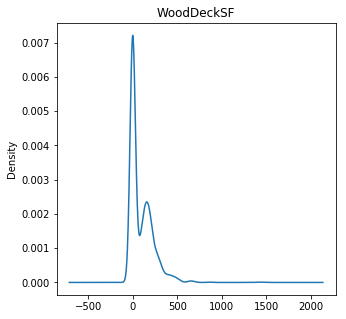



count    1459.000000
mean       48.313914
std        68.883364
min         0.000000
25%         0.000000
50%        28.000000
75%        72.000000
max       742.000000
Name: OpenPorchSF, dtype: float64


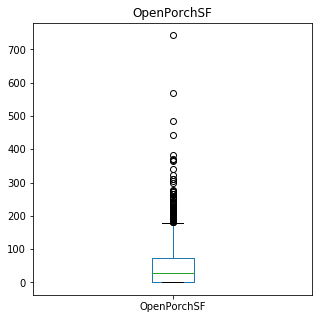

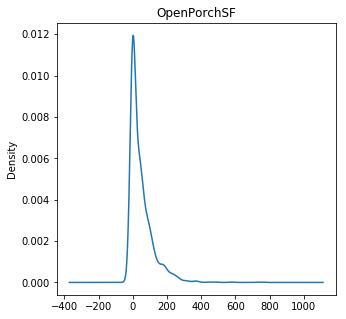



count    1459.000000
mean       24.243317
std        67.227765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64


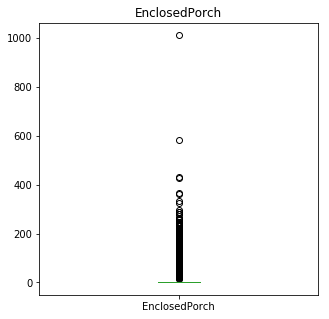

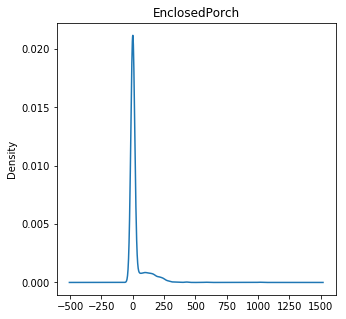



count    1459.000000
mean        1.794380
std        20.207842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       360.000000
Name: 3SsnPorch, dtype: float64
0      1446
153       2
360       1
323       1
255       1
225       1
224       1
219       1
176       1
174       1
150       1
120       1
86        1
Name: 3SsnPorch, dtype: int64


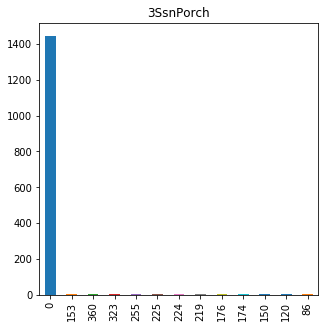



count    1459.000000
mean       17.064428
std        56.609763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64


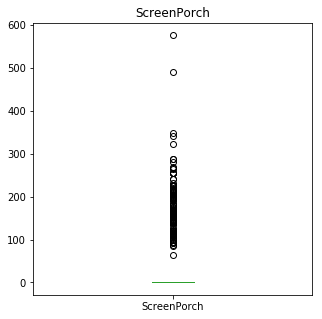

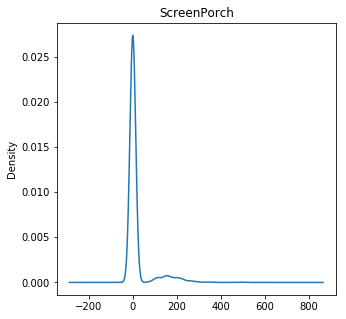



count    1459.000000
mean        1.744345
std        30.491646
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
0      1453
800       1
561       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64


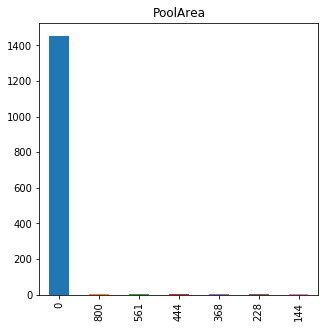



count      3
unique     2
top       Ex
freq       2
Name: PoolQC, dtype: object
Ex    2
Gd    1
Name: PoolQC, dtype: int64


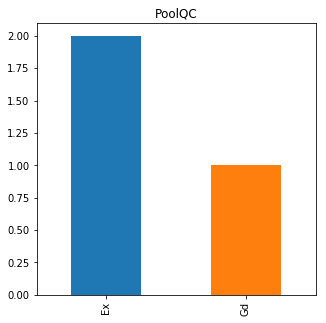



count       290
unique        4
top       MnPrv
freq        172
Name: Fence, dtype: object
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64


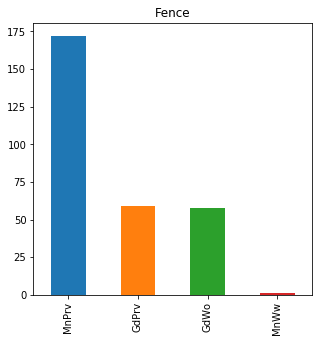



count       51
unique       3
top       Shed
freq        46
Name: MiscFeature, dtype: object
Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64


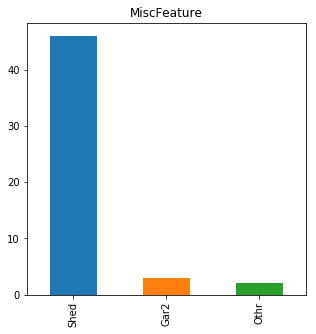



count     1459.000000
mean        58.167923
std        630.806978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64


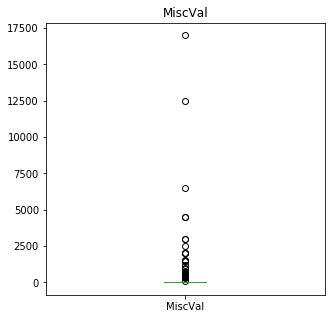

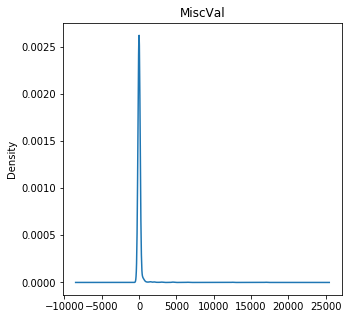



count    1459.000000
mean        6.104181
std         2.722432
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
6     250
7     212
5     190
4     138
3     126
8     111
9      95
10     84
2      81
1      64
11     63
12     45
Name: MoSold, dtype: int64


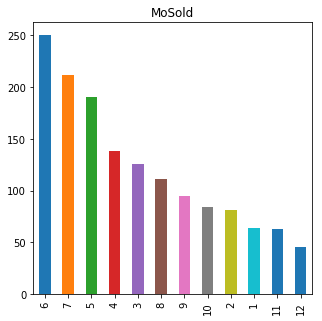



count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64


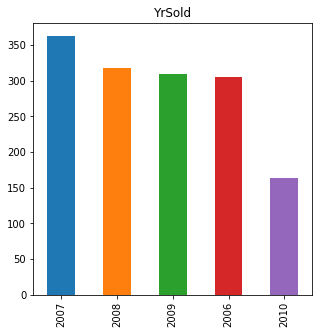



count     1458
unique       9
top         WD
freq      1258
Name: SaleType, dtype: object
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64


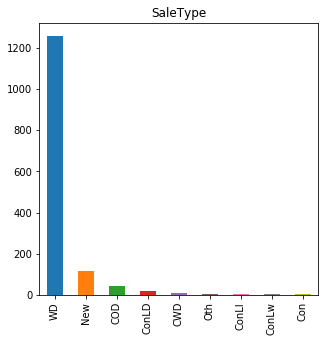



count       1459
unique         6
top       Normal
freq        1204
Name: SaleCondition, dtype: object
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64


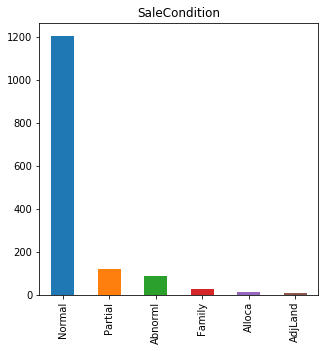

In [12]:
describeData(df_test)

### 3.2.2 Target Variable: Sale Price


 mu = 180921.20 and sigma = 79415.29



Text(0.5,1,'SalePrice distribution')

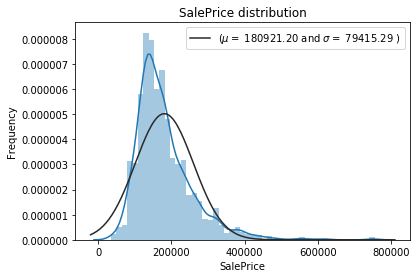

In [13]:
sns.distplot(df_train['SalePrice'], fit = norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

***The distribution shows a preference to cheaper homes. To make the distribution more symmetric, we try taking its logarithm.***


 mu = 1.08 and sigma = 0.01



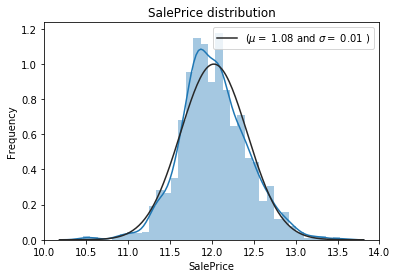

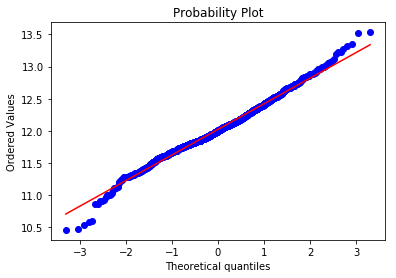

In [14]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'], fit = norm);
(mu, sigma) = norm.fit(np.log10(df_train['SalePrice']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

***The data appears more normally distributed. Thus, we'll take log10(SalePrice) as target variable.***

## 3.3 Correlation and Interactions

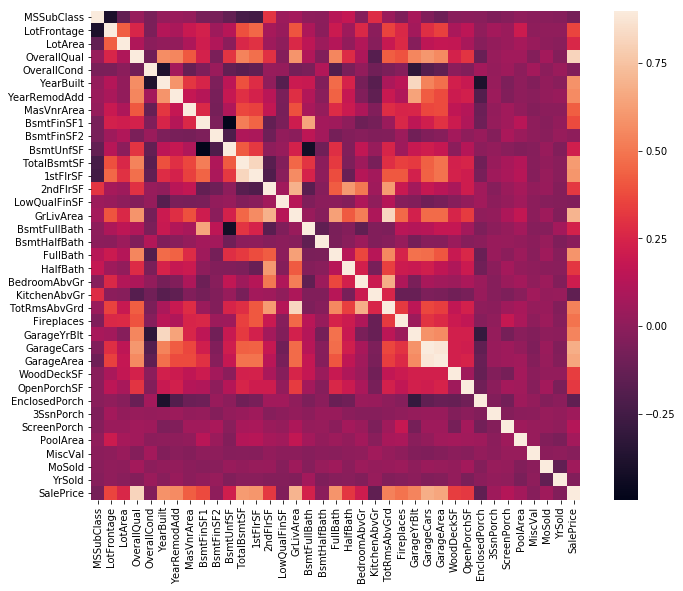

In [15]:
#Correlation map to see how features are correlated 
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

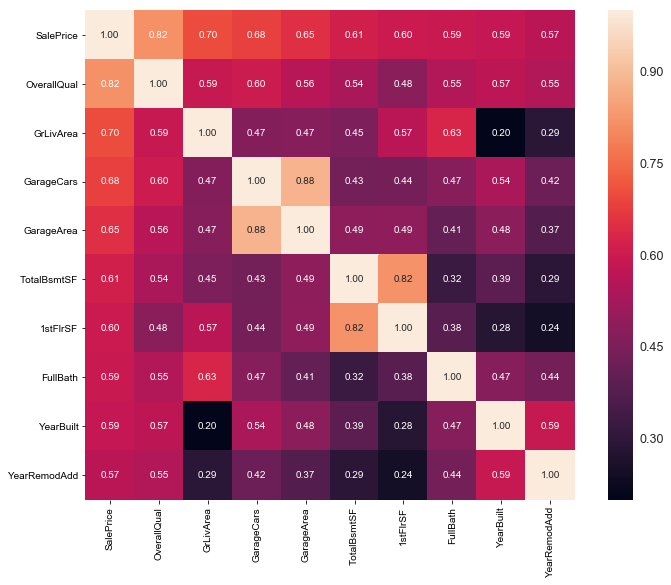

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
plt.subplots(figsize=(12,9))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

***We can observe from the heatmap that the top 9 attributes which related to SalePrice mostly are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt and YearRemodAdd.***

### Neighborhood vs. SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

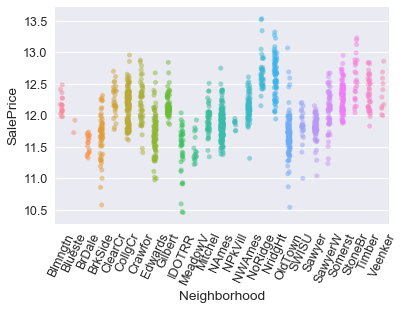

In [17]:
sns.stripplot(x = df_train.Neighborhood, y = df_train.SalePrice,
              order = np.sort(df_train.Neighborhood.unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=65)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

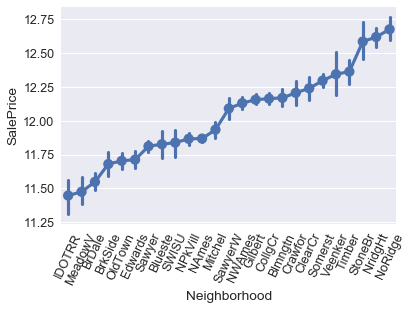

In [18]:
Neighborhood_meanSalePrice = df_train.groupby('Neighborhood')['SalePrice'].mean()
Neighborhood_meanSalePrice = Neighborhood_meanSalePrice.sort_values()
sns.pointplot(x = df_train.Neighborhood, y = df_train.SalePrice,
              order = Neighborhood_meanSalePrice.index)
 
plt.xticks(rotation = 65)

## 3.4 Outliers

### Original Construction Date vs Year Garage Was Built

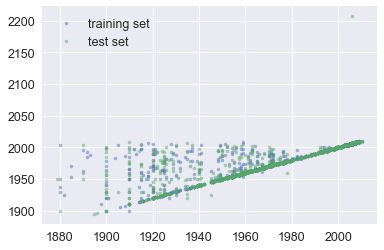

In [19]:
plt.plot(df_train.YearBuilt, df_train.GarageYrBlt,
         '.', alpha=0.5, label = 'training set')
 
plt.plot(df_test.YearBuilt, df_test.GarageYrBlt,
         '.', alpha=0.5, label = 'test set')
 
plt.legend()

***From the figure we can know that the majority of garages were built at the same time as the houses they belong to. We also see a number of strange points. In both train and test sets, we have several garages that were built as many as 10 years earlier than their houses, and in the test set we have a garage from later than 2200.***

### Ground Living Area Square Feet vs. Sale Price

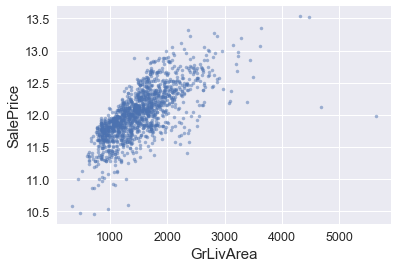

In [20]:
plt.plot(df_train.GrLivArea, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

***There is a strong dependence of sale price on the total living area. The larger the house, the more expensive it tends to be.***  
***We can see there are two points towards the lower right part of the plot that don’t seem to fit in with the rest. These two very large houses (bigger than 4000 sqft) with low sale prices. We can treat them as outliers and exclude them.***

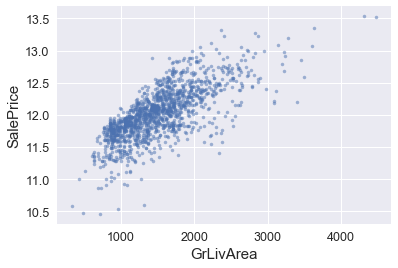

In [21]:
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 12.5)].index)
plt.plot(df_train.GrLivArea, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

### Lot Frontage vs. Sale Price

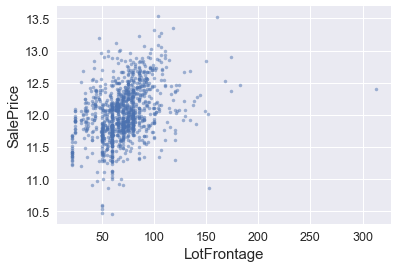

In [22]:
plt.plot(df_train.LotFrontage, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('LotFrontage', fontsize=15)
plt.show()

***There is no strong dependence of sale price on the lot frontage.***  
***We can see there are one point towards the upper right part of the plot that don’t seem to fit in with the rest. We can treat it as a outlier and exclude it.***

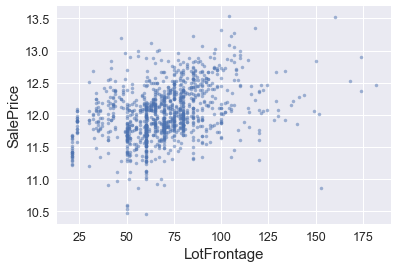

In [23]:
df_train = df_train.drop(df_train[(df_train['LotFrontage'] > 300) & (df_train['SalePrice'] < 12.5)].index)
plt.plot(df_train.LotFrontage, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('LotFrontage', fontsize=15)
plt.show()

### Type 2 Finished Basement Square Feet vs. Sale Price

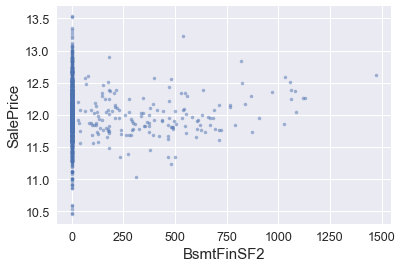

In [24]:
plt.plot(df_train.BsmtFinSF2, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize=15)
plt.show()

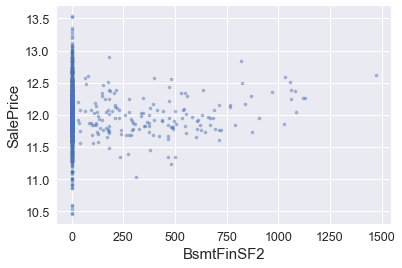

In [25]:
df_train = df_train.drop(df_train[(df_train['BsmtFinSF2'] > 400) & (df_train['SalePrice'] > 13)].index)
plt.plot(df_train.BsmtFinSF2, df_train.SalePrice, '.', alpha = 0.5)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize=15)
plt.show()

## 3.5 Figure Out Missing Data

### 3.5.1 Find missing data

In [26]:
# Save data for redividing train and test data sets
original_train = df_train.shape[0]
y_train = df_train.SalePrice.values

In [27]:
df_whole = pd.concat((df_train, df_test)).reset_index(drop=True)
df_whole.drop(['SalePrice'], axis=1, inplace=True)
print("df_whole size is : {}".format(df_whole.shape))

df_whole size is : (2915, 79)


In [28]:
def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    print(X_null)

In [29]:
print(count_missing(df_whole))

Alley           2717
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2344
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2810
PoolQC          2906
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64
None


In [30]:
df_whole_na = (df_whole.isnull().sum() / len(df_whole)) * 100
df_whole_na = df_whole_na.drop(df_whole_na[df_whole_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_whole_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691252
MiscFeature,96.397942
Alley,93.207547
Fence,80.411664
FireplaceQu,48.713551
LotFrontage,16.672384
GarageQual,5.454545
GarageCond,5.454545
GarageFinish,5.454545
GarageYrBlt,5.454545


***We can find that there is a large percentage of missing data in the dataset. However, most of those missing data is not meaningless. Basesd on our findings, we decided to fill up those data primaryly in four ways. First, we would fill up some missing value with "none", which means that this house does not have such attribute. For example, if the value for 'BsmtQual' is missing, it indicates that this house has no basement. The second way to deal with missing value is filling them with '0'. For exapmle, if this house has no basement, we would fill the 'BsmtFinSF1' and related quantitative missing value with 0, simply due to its absence of basement. The third way to fill up with missing value is to fill them with mode, which is the most frequent value in such attribute. Moreover, there are two exceptions. One is the grage year built, another one is lot frontage. We will illustrate how we deal with these two special case in the following part.***

### 3.5.2 Make Up Missing Data

In [31]:
feats_fillnaNA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']
 
df_whole.loc[:, feats_fillnaNA] = df_whole[feats_fillnaNA].fillna('None')

In [32]:
feats_fillnaZERO = ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars', 'MasVnrArea']

df_whole.loc[:,feats_fillnaZERO] = df_whole[feats_fillnaZERO].fillna(0)

***The missing values for garage, pool or basement-related features simply imply that the house does not have a garage, pool or basement respectively. Thus, it makes sense to fill these missing values with None or 0.***

***We'll make up the missing values of MSZoning, LotFrontage, Utilities, Exterior1st, Exterior2nd, Electrical, KitchenQual, Functional, GarageYrBlt, SaleType with further consideration.***

***For the house has no garage, we fill it with YearBuilt.***

In [33]:
df_whole.loc[:,'GarageYrBlt'] = df_whole['GarageYrBlt'].fillna(df_whole.YearBuilt)

In [34]:
feats_fillnamode = ['Electrical', 'MSZoning', 'Exterior1st', 'Exterior2nd', 
                       'KitchenQual', 'SaleType']
 
df_whole.loc[:, feats_fillnamode] = df_whole[feats_fillnamode].fillna(df_whole[feats_fillnamode].mode().iloc[0])

***For LotFrontage: since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.***

In [35]:
df_whole["LotFrontage"] = df_whole.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

*** For Utilities: all records are "AllPub" in test data set, this feature won't help in predictive modelling. We can remove it.***

In [36]:
df_whole = df_whole.drop(['Utilities'], axis=1)

In [37]:
df_whole["Functional"] = df_whole["Functional"].fillna("Typ")

In [38]:
print(count_missing(df_whole))

Series([], dtype: float64)
None


## 3.6.  Feature Engineering

### Transform Numerical Variables

In [39]:
df_whole['MSSubClass'] = df_whole['MSSubClass'].apply(str)
df_whole['OverallCond'] = df_whole['OverallCond'].astype(str)
df_whole['YrSold'] = df_whole['YrSold'].astype(str)
df_whole['MoSold'] = df_whole['MoSold'].astype(str)

### Apply LabelEncoder to Categorical Features

In [40]:
categorical_features = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for feat in categorical_features:
    lb = LabelEncoder() 
    lb.fit(list(df_whole[feat].values)) 
    df_whole[feat] = lb.transform(list(df_whole[feat].values))

# shape        
print('Shape all_data: {}'.format(df_whole.shape))

Shape all_data: (2915, 78)


***Adding total square feet feature ***

In [41]:
df_whole['TotalSF'] = df_whole['TotalBsmtSF'] + df_whole['1stFlrSF'] + df_whole['2ndFlrSF']

### Skewed Features

In [42]:
numeric_feats = df_whole.dtypes[df_whole.dtypes != "object"].index

skewed_feats = df_whole[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,17.682542
LotArea,13.141138
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.993598
KitchenAbvGr,4.298845
BsmtFinSF2,4.155517
EnclosedPorch,4.000796
ScreenPorch,3.954650


In [43]:
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df_whole[feat] = boxcox1p(df_whole[feat], lam)

### Transform Object Features by get_dummies

In [44]:
df_whole = pd.get_dummies(df_whole)
print(df_whole.shape)

(2915, 220)


### Divide df_whole into Train and Test

In [45]:
df_train = df_whole[:original_train]
df_test = df_whole[original_train:]

# 4. Methodology and Settings

In [46]:
n_folds = 5

def checkAccuracy(model):
    kf = KFold(n_folds, shuffle = True, random_state = 50).get_n_splits(df_train.values)
    accuracy_score = np.sqrt(-cross_val_score(model, df_train.values, y_train, scoring = "neg_mean_squared_error", cv = kf))
    return(accuracy_score)

### Lasso

In [47]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
score = checkAccuracy(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1117 (0.0073)



### XGBoost

In [48]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.05, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2200,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             random_state = 7, nthread = -1)
score = checkAccuracy(model_xgb)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBoost score: 0.1155 (0.0062)



### LightGBM

In [49]:
model_lgb = lgb.LGBMRegressor(objective = 'regression',num_leaves = 5,
                              learning_rate = 0.05, n_estimators = 720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)
score = checkAccuracy(model_lgb)
print("LightGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGBM score: 0.1158 (0.0064)



### Gradient Boosting Regression

In [50]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = 5)
score = checkAccuracy(GBoost)
print("Gradient Boosting Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting Regression score: 0.1175 (0.0086)



### Elastic Net Regression

In [51]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 3))
score = checkAccuracy(ENet)
print("Elastic Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Elastic Net Regression score: 0.1117 (0.0074)



### Kernel Ridge Regression

In [52]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)
score = checkAccuracy(KRR)
print("Kernel Ridge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge Regression score: 0.1149 (0.0081)



## Stacking Models

### Stacking averaged Models Class

In [53]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds = 5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, x, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state = 156)
        
        out_of_fold_predictions = np.zeros((x.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(x, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(x[train_index], y[train_index])
                y_pred = instance.predict(x[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, x):
        meta_features = np.column_stack([
            np.column_stack([model.predict(x) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = checkAccuracy(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

# 5. Prediction Results

## 5.1 Candidate models

In [ ]:
def getSquaredError(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### StackedRegressor

In [ ]:
stacked_averaged_models.fit(df_train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(df_train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(df_test.values))
print(getSquaredError(y_train, stacked_train_pred))

### XGBoost

In [ ]:
model_xgb.fit(df_train, y_train)
xgb_train_pred = model_xgb.predict(df_train)
xgb_pred = np.expm1(model_xgb.predict(df_test))
print(getSquaredError(y_train, xgb_train_pred))

### LightGBM

In [ ]:
model_lgb.fit(df_train, y_train)
lgb_train_pred = model_lgb.predict(df_train)
lgb_pred = np.expm1(model_lgb.predict(df_test.values))
print(getSquaredError(y_train, lgb_train_pred))

In [ ]:
print('score on train data set:')
print(getSquaredError(y_train, stacked_train_pred * 0.65 +
               xgb_train_pred * 0.15 + lgb_train_pred * 0.2 ))

## 5.2 Ensemble models

In [ ]:
ensemble = stacked_pred * 0.65 + xgb_pred * 0.15 + lgb_pred * 0.2

## 5.3 Submission and results

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

# 6. Discussion

As our original design, the overal performance is about 0.12 according to kaggle score. In order to improve the performance and score, we compared our design with some designs on the Kernels. After comparison, we found our weakness is in the step of dealing with features. We just did log to correct the skewness of features. It seems that this is not enoght to improve its normalization. Therefore, we adopted box cox, which is a way to eliminate the skewness, to improve the performance. After we used the box cox, the overal score is improved. 

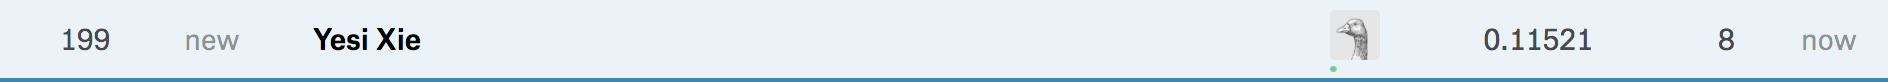

# 7. Conclussion

As we can see from the analysis, there are lots of factors contributing to the sale price of houses. Some of them might be easy to identify, while others would be revealed by data analysis. Ensembling models is a important step when we want to improve the performance of models. Through the different ways of ensembling, it will lead to different performance and scores. For our design, the stacked model, xgboost, and light gbm models have the best performance when ensembling together. Moreover, the box cox is also an important way to deal with the skewness of features, which would improve the accuracy of our predictions.

# 8. Bibliography

(n.d.). Retrieved March 26, 2018, from https://www.kaggle.com/wiki/Home

Brett Romero, Data Science: A Kaggle Walkthrough - Introduction. Retrieved March 26, 2018, from http://brettromero.com/data-science-a-kaggle-walkthrough-introduction/

C. M. Bishop, Pattern Recognition and Machine Learning. Springer, 2006.

Alex Seutin, Ian Jones, Using Machine Learning to Predict Housing Prices Given Multivariate Input.  Fall, 2016

Jason Brownlee, (2016, September 21). A Gentle Introduction to XGBoost for Applied Machine Learning. Retrieved March 26, 2018, from https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

Ofir Chakon, Practical machine learning: Ridge regression vs. Lasso. (2017, August 10). Retrieved March 26, 2018, from https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/

Scott, D. (n.d.). Box-Cox Transformations. Retrieved from http://onlinestatbook.com/2/transformations/box-cox.html

Serigne. (n.d.). Stacked Regressions to predict House Prices. Retrieved April 26, 2018, from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard